## Observations and Insights

## Dependencies and starter code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata_study_results_combined = pd.DataFrame(pd.merge(mouse_metadata ,study_results, on="Mouse ID", how="inner"))

mouse_metadata_study_results_combined


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
tumor_study_result_group = mouse_metadata_study_results_combined.groupby("Drug Regimen")


In [8]:

mouse_metadata_study_results_combined[["Drug Regimen","Metastatic Sites"]]

,Drug Regimen,Metastatic Sites
0,Ramicane,0
1,Ramicane,0
2,Ramicane,1
3,Ramicane,1
4,Ramicane,1
...,...,...
1888,Naftisol,2
1889,Naftisol,3
1890,Naftisol,4
1891,Naftisol,4


In [9]:
datapoints_per_regimen = pd.DataFrame(tumor_study_result_group["Tumor Volume (mm3)"].count()).rename(columns={"Tumor Volume (mm3)": "Total Datapoints"})
regimen_df = datapoints_per_regimen.rename(columns={"Drug Regimen": "Regimen"})

regimen_df = regimen_df.sort_values("Total Datapoints", ascending=False)

regimen_df

,Total Datapoints
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


## Summary statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_study_result_group["Tumor Volume (mm3)"].describe()


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [12]:
colors= ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]

## Bar plots

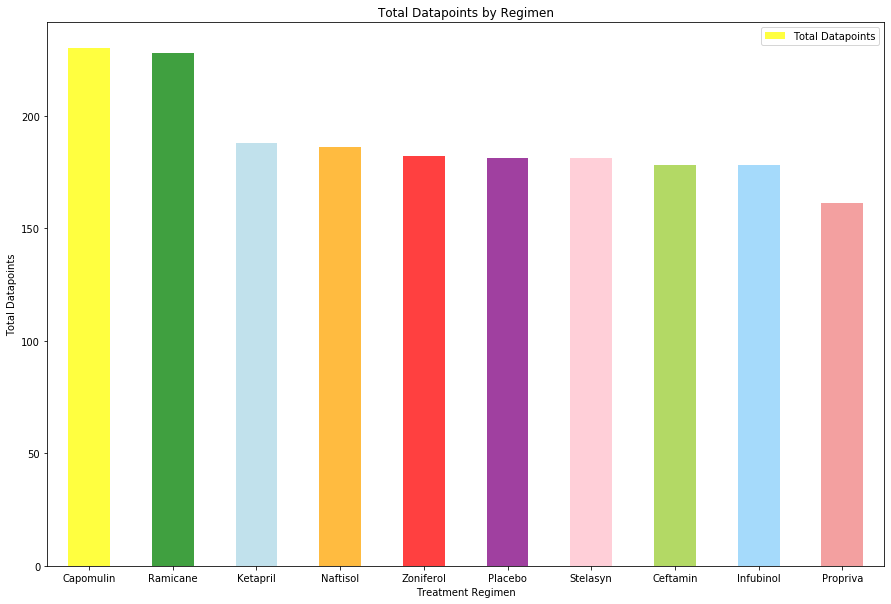

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas



regimen_df.plot(kind="bar", figsize=(15,10), color=[colors], alpha=0.75, align="center")
plt.xticks(rotation="0")

# Set title for the chart 
plt.title("Total Datapoints by Regimen")

#set labels for the x and y axis
plt.xlabel("Treatment Regimen")
plt.ylabel("Total Datapoints")

#Show pandas plot
plt.show()


In [14]:
# Filter the DataFrame down only to those columns to chart



In [15]:
# use comprehension list to get series for x axis
x_ax =[value for value in mouse_metadata_study_results_combined["Drug Regimen"].unique()]

x_axis = np.arange(len(x_ax))
tick_locations = [value for value in x_ax]


([<matplotlib.axis.XTick at 0x1a86d94ae88>,
 <a list of 10 Text xticklabel objects>)

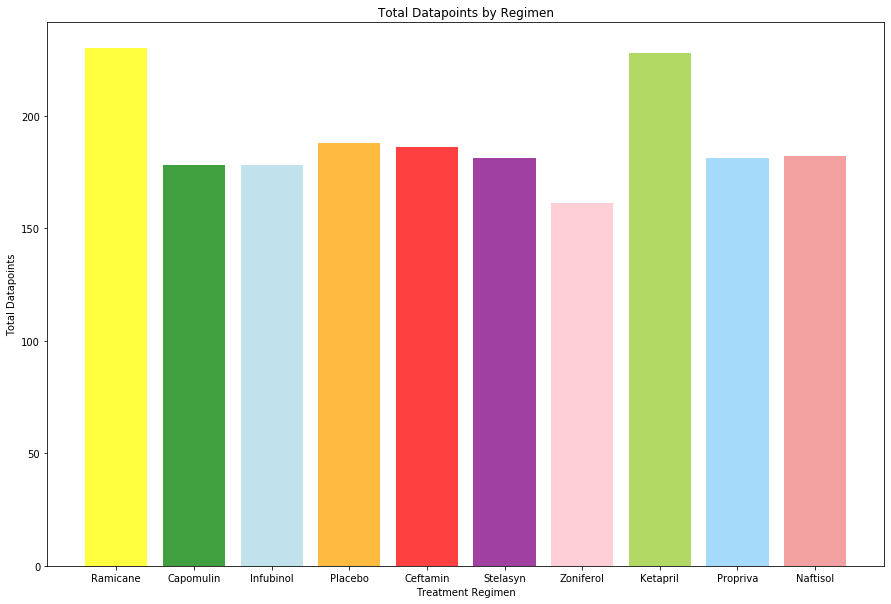

In [16]:
# Create a list indicating where to write x labels and set figure size to adjust for space
colors= ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
plt.figure(figsize=(15,10))
plt.bar(x_ax, datapoints_per_regimen["Total Datapoints"], color=colors, alpha=.75, align="center")
plt.title("Total Datapoints by Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Total Datapoints")
plt.xticks(tick_locations, x_ax, rotation="0" )


([<matplotlib.axis.XTick at 0x1a86d422848>,
 <a list of 10 Text xticklabel objects>)

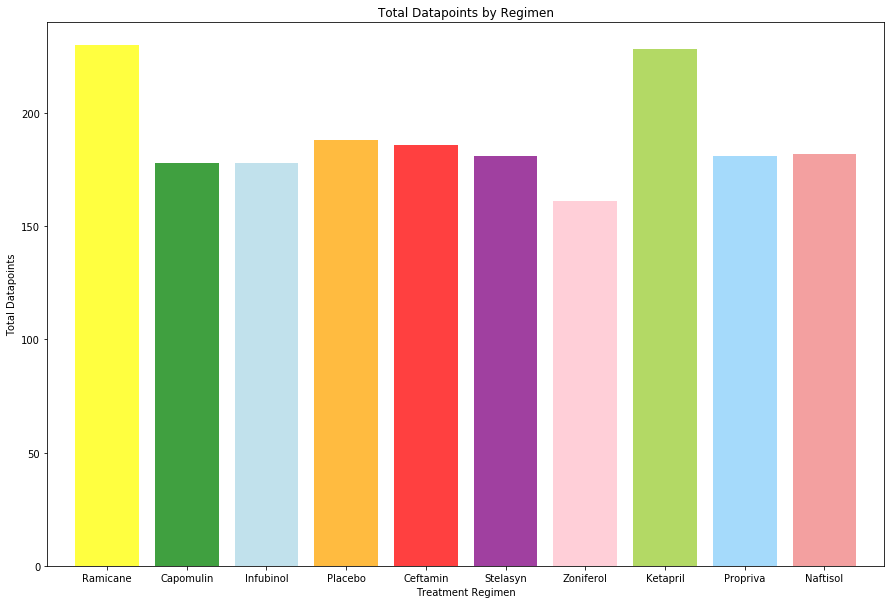

In [17]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# use comprehension list to get series for x and y axis
x_axis =[value for value in mouse_metadata_study_results_combined["Drug Regimen"].unique()]
y_axis = [value for value in datapoints_per_regimen["Total Datapoints"]]

colors= ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.figure(figsize=(15,10))
plt.xlim(-0.75, len(x_axis) -.25)
plt.ylim(0, max(y_axis) + 10)


plt.bar(x_axis, y_axis, color=colors, alpha=0.75, align="center")
plt.title("Total Datapoints by Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Total Datapoints")

plt.xticks(tick_locations, x_axis)





In [18]:
# Create a list indicating where to write x labels and set figure size to adjust for space


In [19]:
gender_group = mouse_metadata_study_results_combined.groupby("Sex")

male_mice = mouse_metadata_study_results_combined.loc[mouse_metadata_study_results_combined["Sex"] == "Male"].count()
male_count = male_mice["Sex"]

female_mice = mouse_metadata_study_results_combined.loc[mouse_metadata_study_results_combined["Sex"] == "Female"].count()
female_count = female_mice["Sex"]

## Pie plots

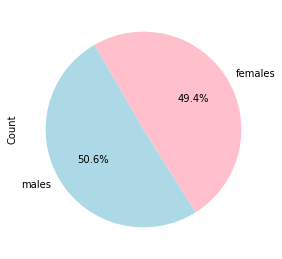

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df = pd.DataFrame({"Count": [male_count, female_count]},
                   index=["males", "females"])

sizes = [male_count, female_count]

colors = ["lightblue", "pink"]

df.plot.pie(y="Count", figsize=(4.5, 4.5), subplots=False, startangle=120, colors=colors, autopct="%1.1f%%", legend=False)


(-1.1108169443723674,
 1.13554197729537,
 -1.1103731586818266,
 1.1357968312586944)

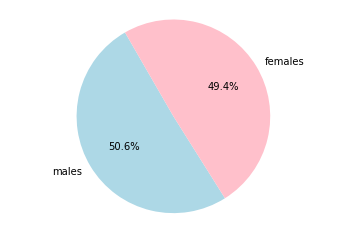

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Labels for the sections of our pie chart
labels = ["males", "females"]

# The values of each section of the pie chart
sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["lightblue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=120)

plt.axis("equal")

## Quartiles, outliers and boxplots

In [22]:
most_promising_df = regimen_df.head(4)

mouse_metadata_study_results_combined["Metastatic Sites"]
most_promising_list = pd.Series([most_promising_df])


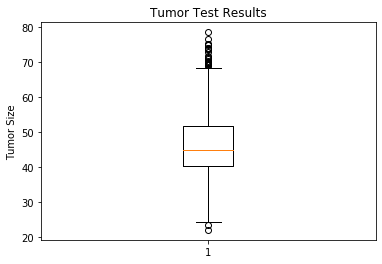

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

most_promising = regimen_df.head(4)

most_promising_regimen_df = pd.merge(most_promising,mouse_metadata_study_results_combined, on="Drug Regimen", how="inner")

regimen_results = most_promising_regimen_df["Tumor Volume (mm3)"].sort_values(ascending=True)

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Test Results')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(regimen_results)
plt.show()

In [37]:
regimen_results_df = pd.DataFrame(regimen_results)

quartiles = regimen_results_df.quartile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

AttributeError: 'DataFrame' object has no attribute 'quartile'

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#mouse_metadata_study_results_combined.head(10)


## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen